In [106]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [107]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

# set up working with the tools by just making a shorter name for our future calls
at = aurorax.tools

In [108]:
# Download an hour of TREx Spectrograph data
dataset_name = "TREX_SPECT_PROCESSED_V1"
start_dt = datetime.datetime(2021, 2, 16, 9, 0)
end_dt = datetime.datetime(2021, 2, 16, 9, 59)
site_uid = "rabb"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

# Read in the data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

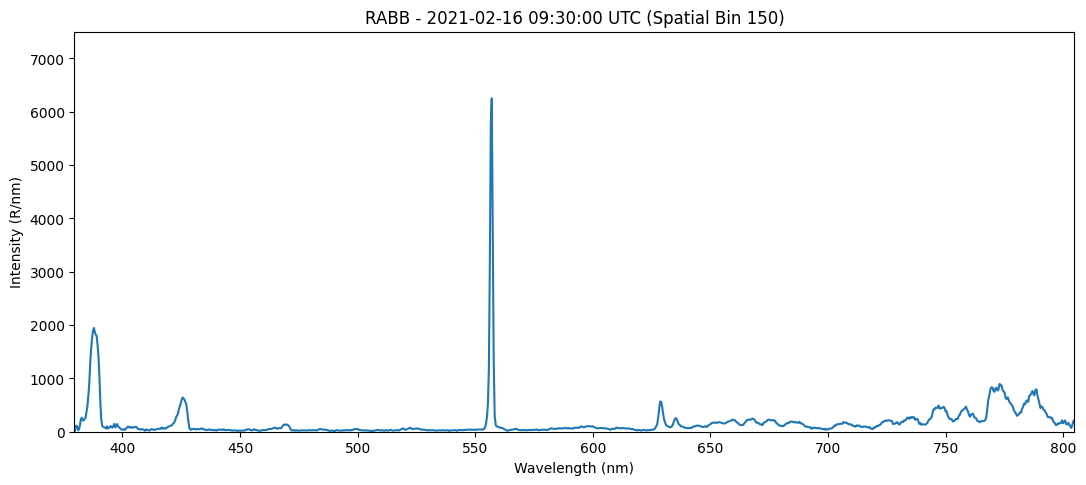

In [109]:
# Let's plot some spectra...

# For an hour of spectrograph data, we will have a number of spectra, taken from
# different times (every 15 seconds for TREx-Spectrograph).

# Also, since these are meridian-scanning spectrographs, we will have a number of
# spectrographs that correspond to different points in the sky (spatial bins),
# along the scan, for each timestamp.

# To begin, let's plot a single spectrum, from one time within our hour of data,
# at one location (spectrograph bin, i.e> spect_loc, 0-255 for TREx)

t_0 = datetime.datetime(2021, 2, 16, 9, 30, 0)
spect_loc = 150

# Call the plotting function
at.spectra.plot(data, t_0, spect_loc, figsize=(10,4))

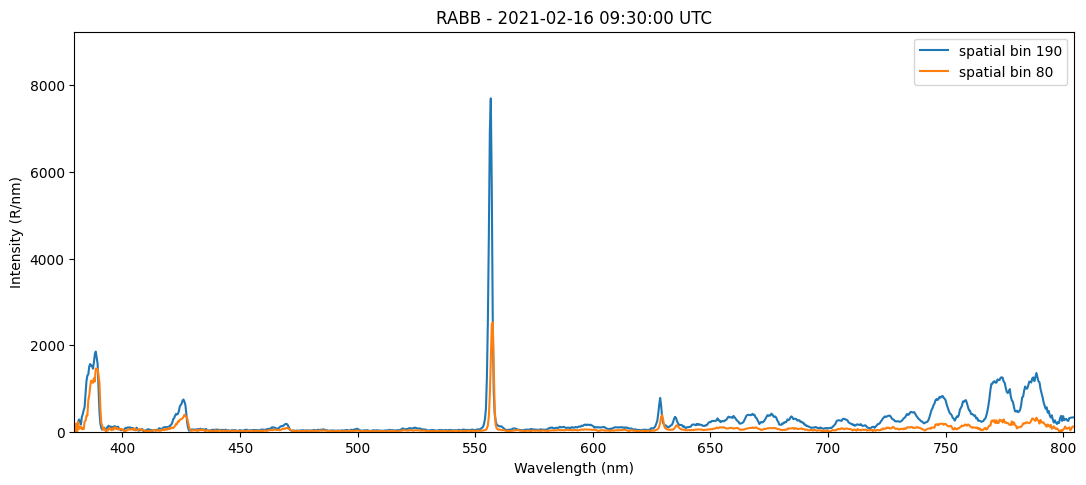

In [110]:
# Now, let's compare the spectra of two different
# locations, at the same time.
t_0 = datetime.datetime(2021, 2, 16, 9, 30, 0)
spect_loc = [190, 80]

# Call the plotting function
at.spectra.plot(data, t_0, spect_loc, figsize=(10,4))

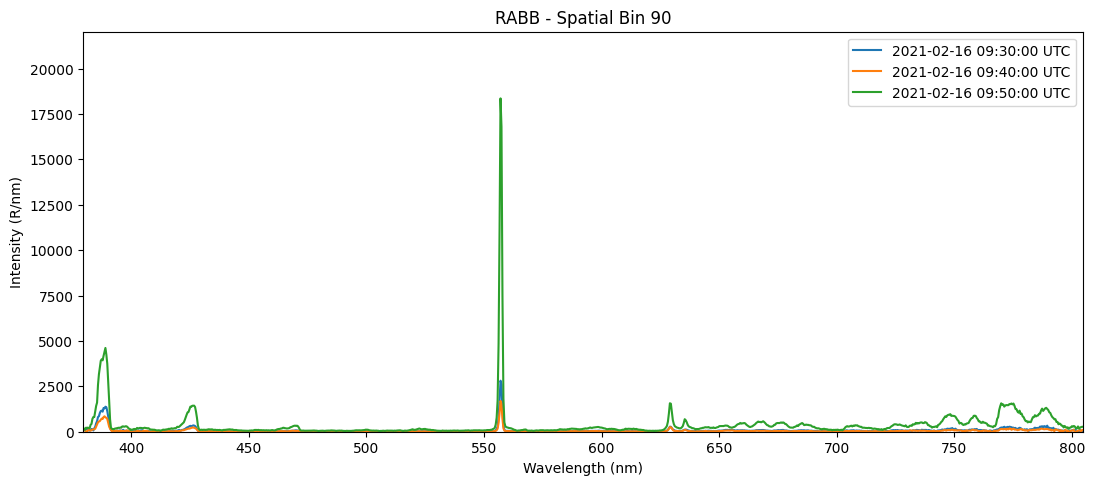

In [111]:
# Let's instead look at how the spectrum of a single location
# evolves over time
t_0 = datetime.datetime(2021, 2, 16, 9, 30, 0)
t_1 = datetime.datetime(2021, 2, 16, 9, 40, 0)
t_2 = datetime.datetime(2021, 2, 16, 9, 50, 0)
spect_loc = 90

# Call the plotting function
at.spectra.plot(data, [t_0, t_1, t_2], spect_loc, figsize=(10,4))

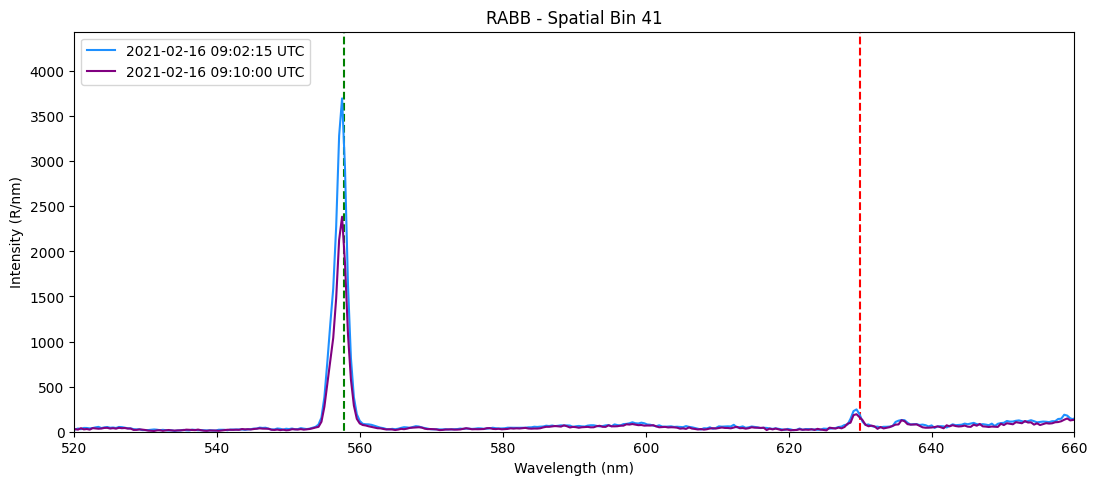

In [112]:
# Let's say we are interested only in the 557.7 and 630.0 nm emission
# lines. Let's restrict our plot to this region.
xlim = [520, 660]

# Let's also overplot the redline and greenline
lines = [557.7, 630.0]
line_colors = ['green', 'red']

# Let's again look at a different location, at two new times
t_0 = datetime.datetime(2021, 2, 16, 9, 2, 15)
t_1 = datetime.datetime(2021, 2, 16, 9, 10, 0)
spect_loc = 41

# Call the plotting function
at.spectra.plot(data, [t_0, t_1], spect_loc, figsize=(10,4), plot_line=lines, 
                plot_line_color=line_colors, xlim=xlim, color=['dodgerblue', 'purple'])